## Review on slopes

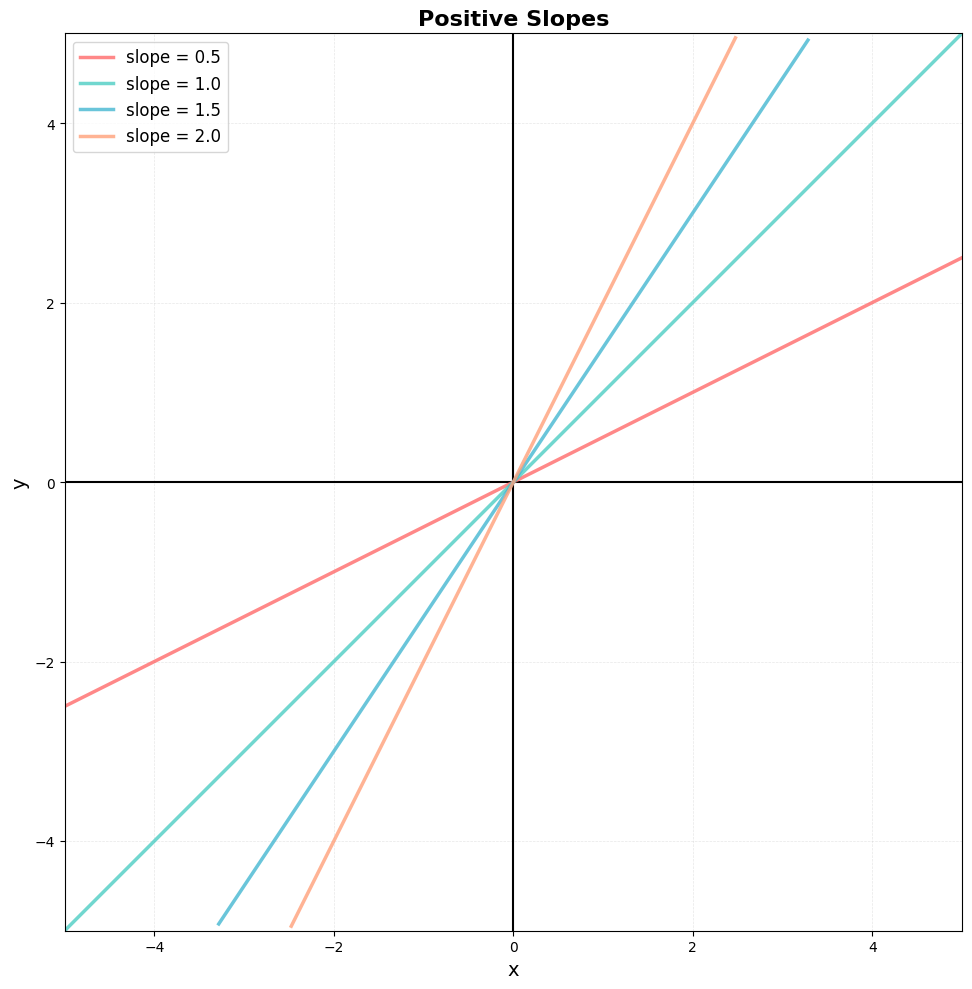

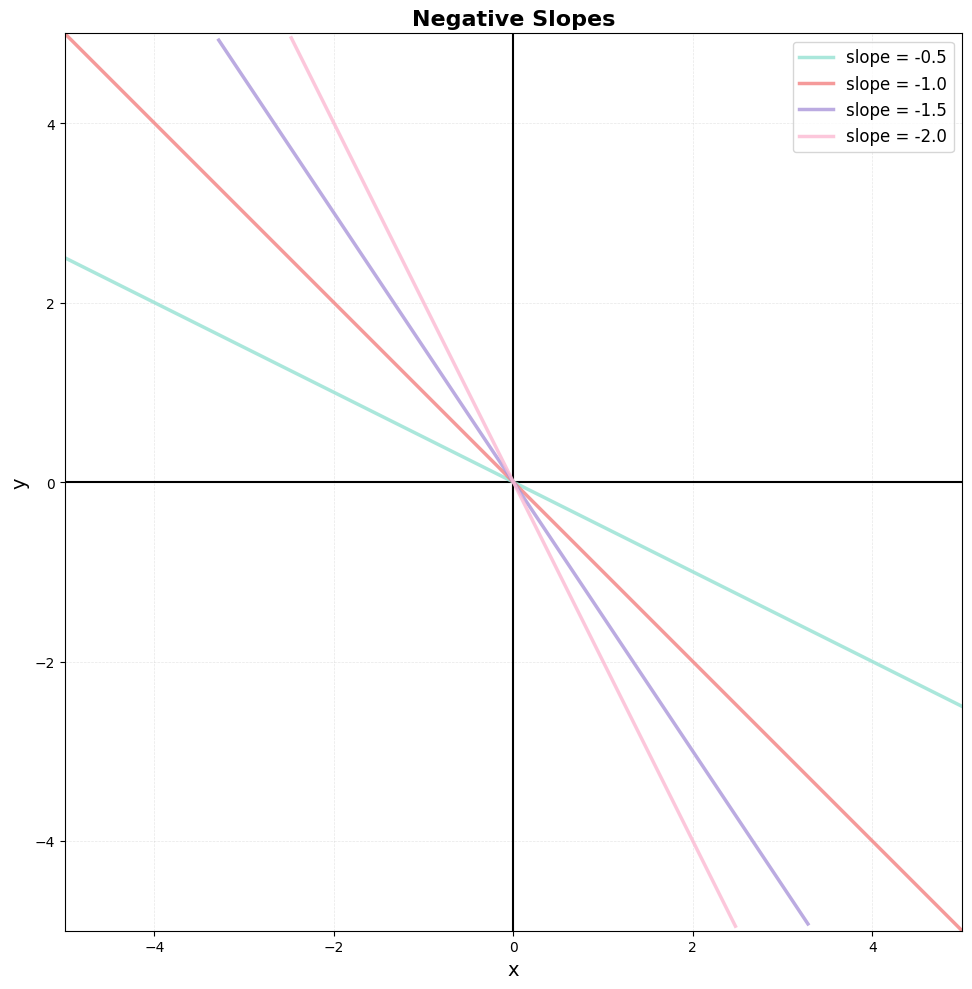

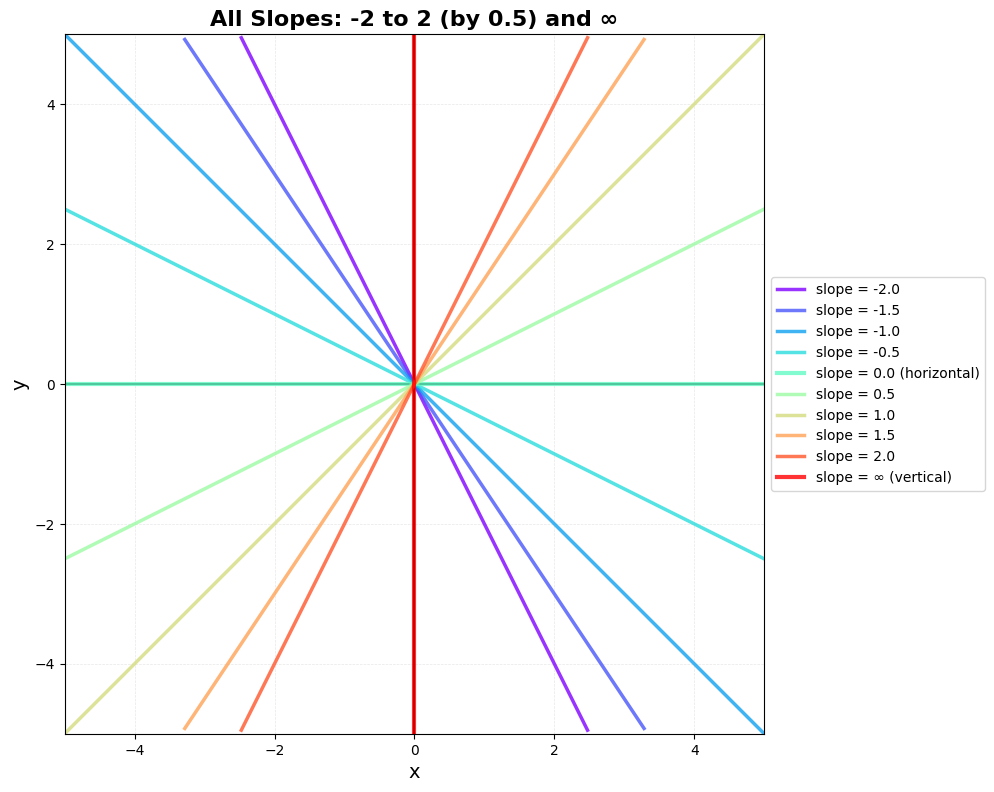

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Set up the figure with a nice grid
def setup_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

# Function to draw a line through origin with given slope
def draw_slope_line(ax, slope, color, label, linewidth=2.5):
    x = np.linspace(-5, 5, 100)
    if slope == 'infinity':
        # Vertical line at x=0
        ax.axvline(x=0, color=color, linewidth=linewidth, label=label, linestyle='-', alpha=0.8)
    else:
        y = slope * x
        # Only plot where y is within bounds
        mask = (y >= -5) & (y <= 5)
        ax.plot(x[mask], y[mask], color=color, linewidth=linewidth, label=label, alpha=0.8)

# POSITIVE SLOPES
fig, ax = setup_axes()
ax.set_title('Positive Slopes', fontsize=16, fontweight='bold')

positive_slopes = [0.5, 1.0, 1.5, 2.0]
colors_positive = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for slope, color in zip(positive_slopes, colors_positive):
    draw_slope_line(ax, slope, color, f'slope = {slope}')

ax.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

# NEGATIVE SLOPES
fig, ax = setup_axes()
ax.set_title('Negative Slopes', fontsize=16, fontweight='bold')

negative_slopes = [-0.5, -1.0, -1.5, -2.0]
colors_negative = ['#95E1D3', '#F38181', '#AA96DA', '#FCBAD3']

for slope, color in zip(negative_slopes, colors_negative):
    draw_slope_line(ax, slope, color, f'slope = {slope}')

ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

# ALL SLOPES TOGETHER
fig, ax = setup_axes()
ax.set_title('All Slopes: -2 to 2 (by 0.5) and ∞', fontsize=16, fontweight='bold')

# All slopes from -2 to 2 by 0.5
all_slopes = np.arange(-2, 2.5, 0.5)

# Create a colormap
colors = cm.rainbow(np.linspace(0, 1, len(all_slopes) + 1))  # +1 for infinity

# Plot all finite slopes
for i, slope in enumerate(all_slopes):
    if slope == 0:
        draw_slope_line(ax, slope, colors[i], f'slope = {slope:.1f} (horizontal)', linewidth=3)
    else:
        draw_slope_line(ax, slope, colors[i], f'slope = {slope:.1f}')

# Add the vertical line (slope = infinity)
draw_slope_line(ax, 'infinity', colors[-1], 'slope = ∞ (vertical)', linewidth=3)

ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Example 1: $\frac{dy}{dx} = y$

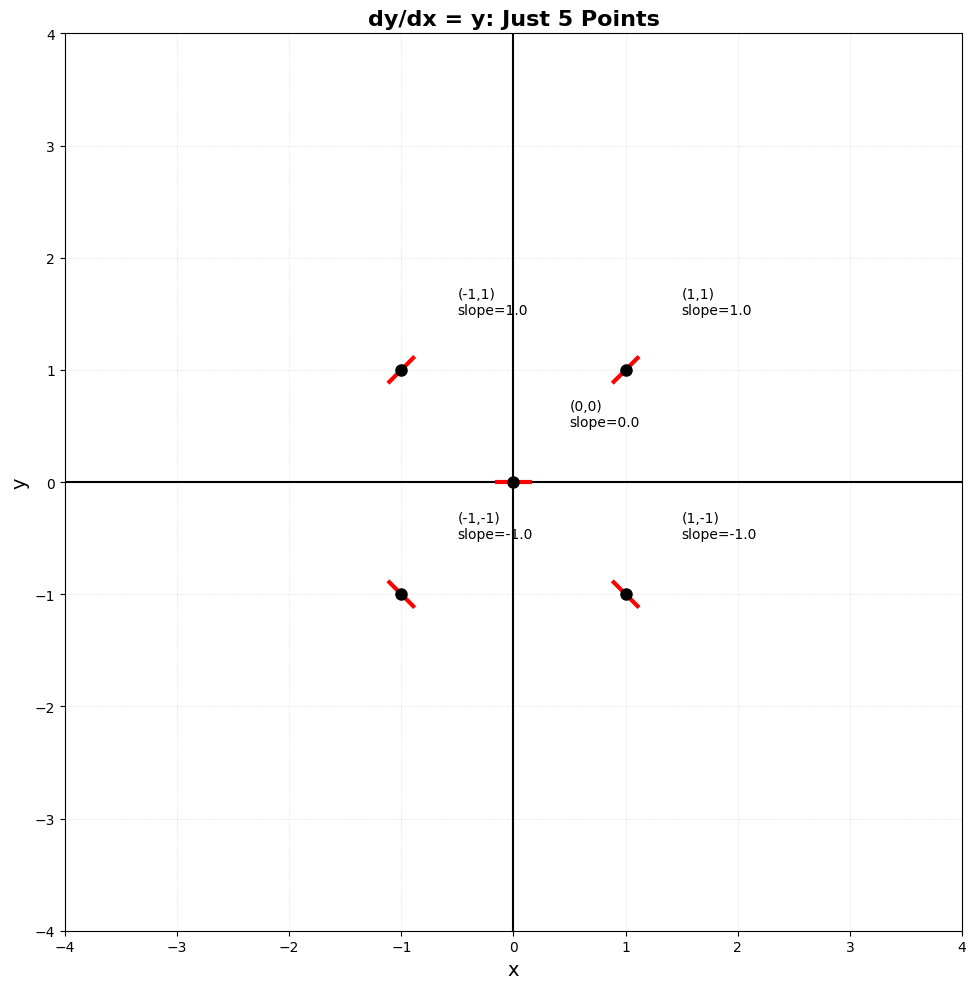

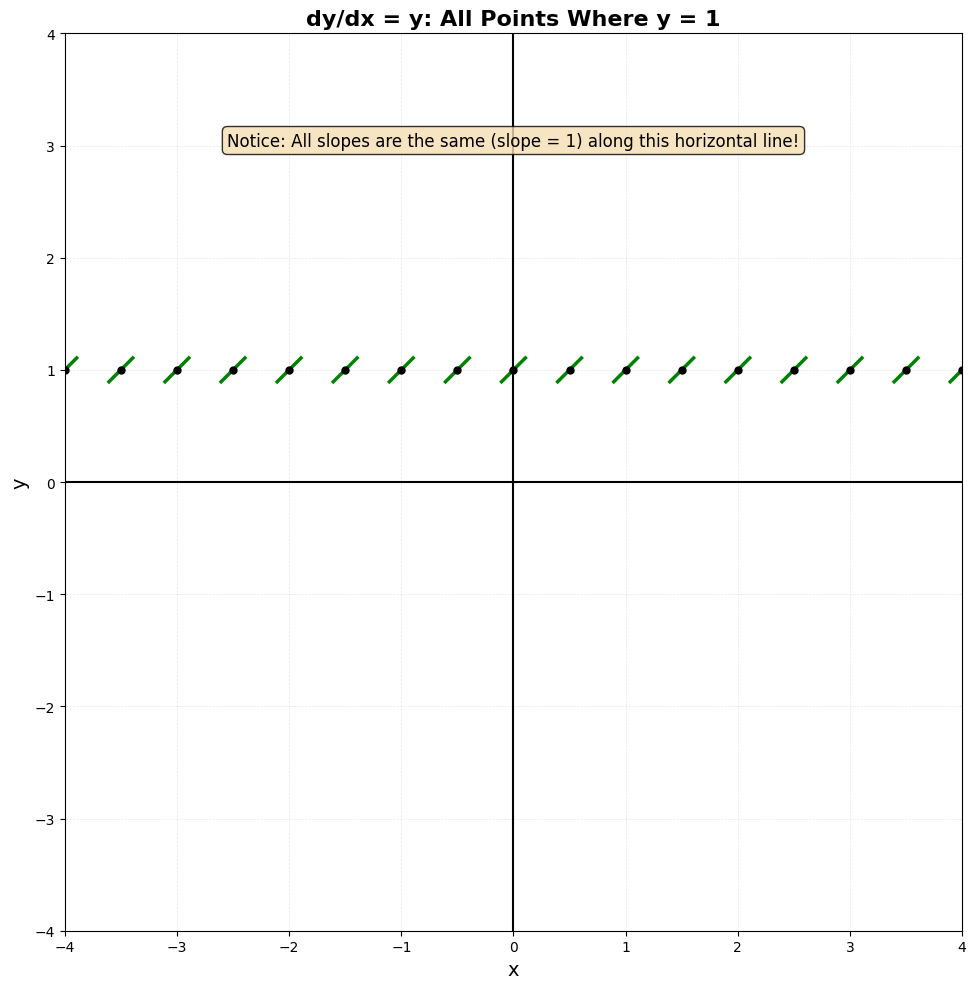

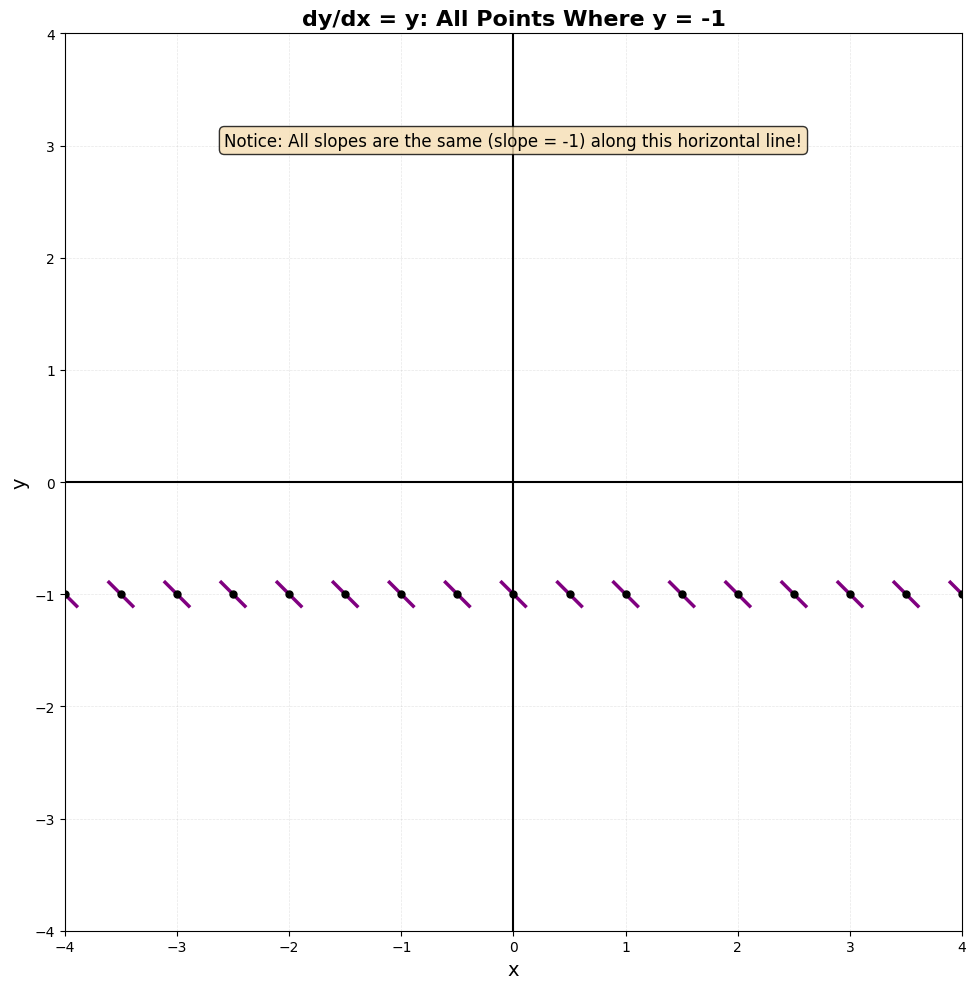

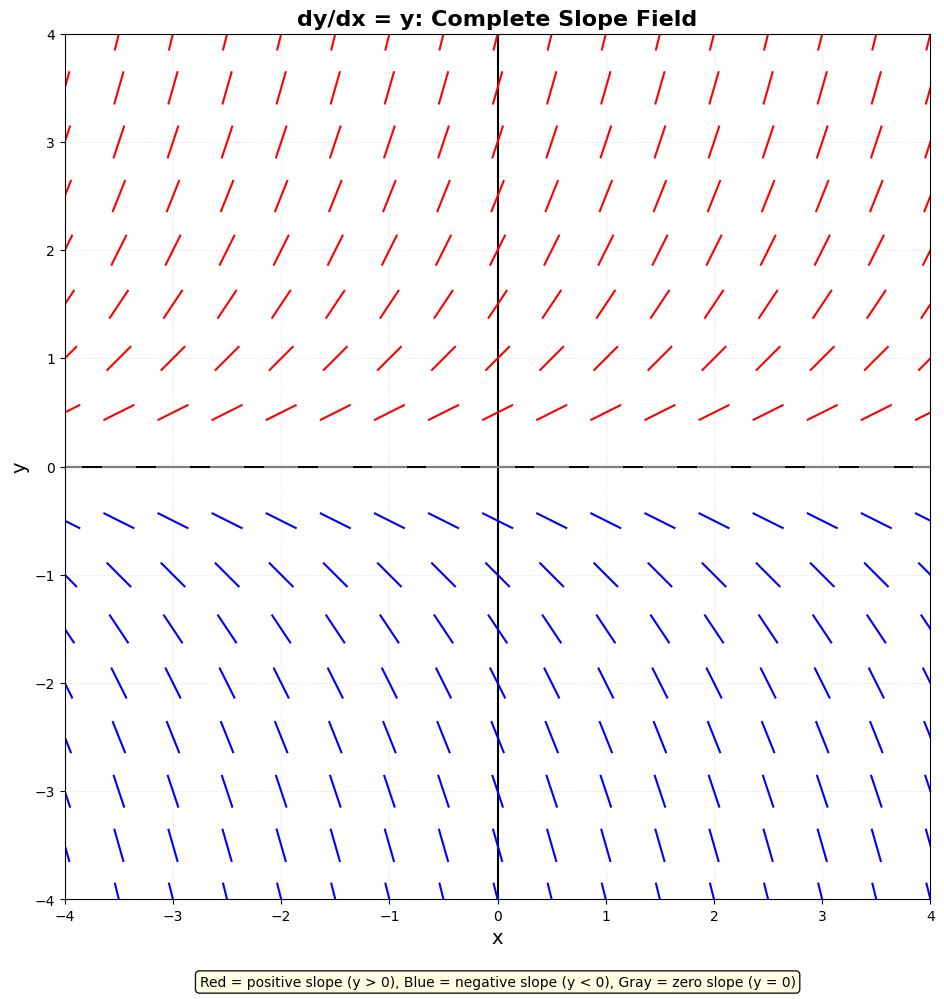

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope):
        # Vertical line
        dx = 0
        dy = length / 2
    else:
        # Calculate dx and dy to make segment of desired length
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

# For dy/dx = y, the slope at any point (x,y) is just y
def slope_function(x, y):
    return y

# STEP 1: Just 5 points - origin and four corners of the unit square
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = y: Just 5 Points', fontsize=16, fontweight='bold')

points = [(0, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

for x, y in points:
    slope = slope_function(x, y)
    draw_slope_segment(ax, x, y, slope, color='red', linewidth=3)
    ax.plot(x, y, 'ko', markersize=8)  # Mark the point

# Add annotations
for x, y in points:
    slope = slope_function(x, y)
    ax.annotate(f'({x},{y})\nslope={slope:.1f}',
                xy=(x, y), xytext=(x+0.5, y+0.5),
                fontsize=10, ha='left')

plt.tight_layout()
plt.show()

# STEP 2: All points with y = 1
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = y: All Points Where y = 1', fontsize=16, fontweight='bold')

y_val = 1
x_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    slope = slope_function(x, y_val)
    draw_slope_segment(ax, x, y_val, slope, color='green', linewidth=2.5)
    ax.plot(x, y_val, 'ko', markersize=5)

ax.text(0, 3, 'Notice: All slopes are the same (slope = 1) along this horizontal line!',
        fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# STEP 3: All points with y = -1
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = y: All Points Where y = -1', fontsize=16, fontweight='bold')

y_val = -1
x_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    slope = slope_function(x, y_val)
    draw_slope_segment(ax, x, -1, slope, color='purple', linewidth=2.5)
    ax.plot(x, -1, 'ko', markersize=5)

ax.text(0, 3, 'Notice: All slopes are the same (slope = -1) along this horizontal line!',
        fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# STEP 4: Everything together
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = y: Complete Slope Field', fontsize=16, fontweight='bold')

x_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    for y in y_values:
        slope = slope_function(x, y)
        # Color code by slope value for visual interest
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.5)

ax.text(0, -4.8, 'Red = positive slope (y > 0), Blue = negative slope (y < 0), Gray = zero slope (y = 0)',
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

## what happens if I trace a solution curve

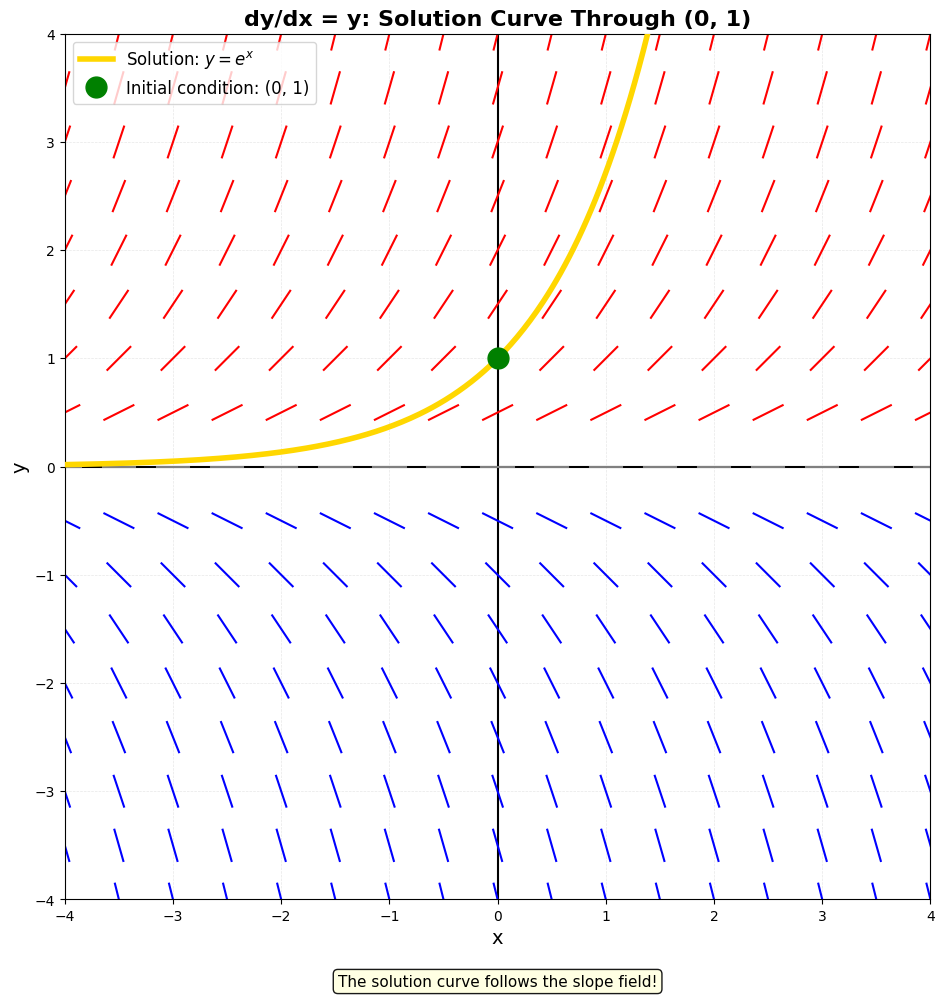

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope):
        dx = 0
        dy = length / 2
    else:
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

def slope_function(x, y):
    return y

# SLOPE FIELD WITH SOLUTION CURVE
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = y: Solution Curve Through (0, 1)', fontsize=16, fontweight='bold')

# Draw the slope field
x_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    for y in y_values:
        slope = slope_function(x, y)
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.5, length=0.3)

# Define the differential equation for the solver
def dy_dx(x, y):
    return y[0]  # solve_ivp expects array input

# Solve the differential equation: y' = y with initial condition y(0) = 1
# The analytical solution is y = e^x

# Solve forward (x from 0 to 4)
sol_forward = solve_ivp(dy_dx, [0, 4], [1], dense_output=True, max_step=0.1)
x_forward = np.linspace(0, 4, 200)
y_forward = sol_forward.sol(x_forward)[0]

# Solve backward (x from 0 to -4)
sol_backward = solve_ivp(dy_dx, [0, -4], [1], dense_output=True, max_step=0.1)
x_backward = np.linspace(0, -4, 200)
y_backward = sol_backward.sol(x_backward)[0]

# Combine the solutions
x_solution = np.concatenate([x_backward[::-1], x_forward[1:]])
y_solution = np.concatenate([y_backward[::-1], y_forward[1:]])

# Plot the solution curve
ax.plot(x_solution, y_solution, 'gold', linewidth=4, label='Solution: $y = e^x$', zorder=5)

# Mark the initial condition
ax.plot(0, 1, 'go', markersize=15, label='Initial condition: (0, 1)', zorder=6)

ax.legend(fontsize=12, loc='upper left')
ax.text(0, -4.8, 'The solution curve follows the slope field!',
        fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

## Example 2: $\frac{dy}{dx} = 2x$

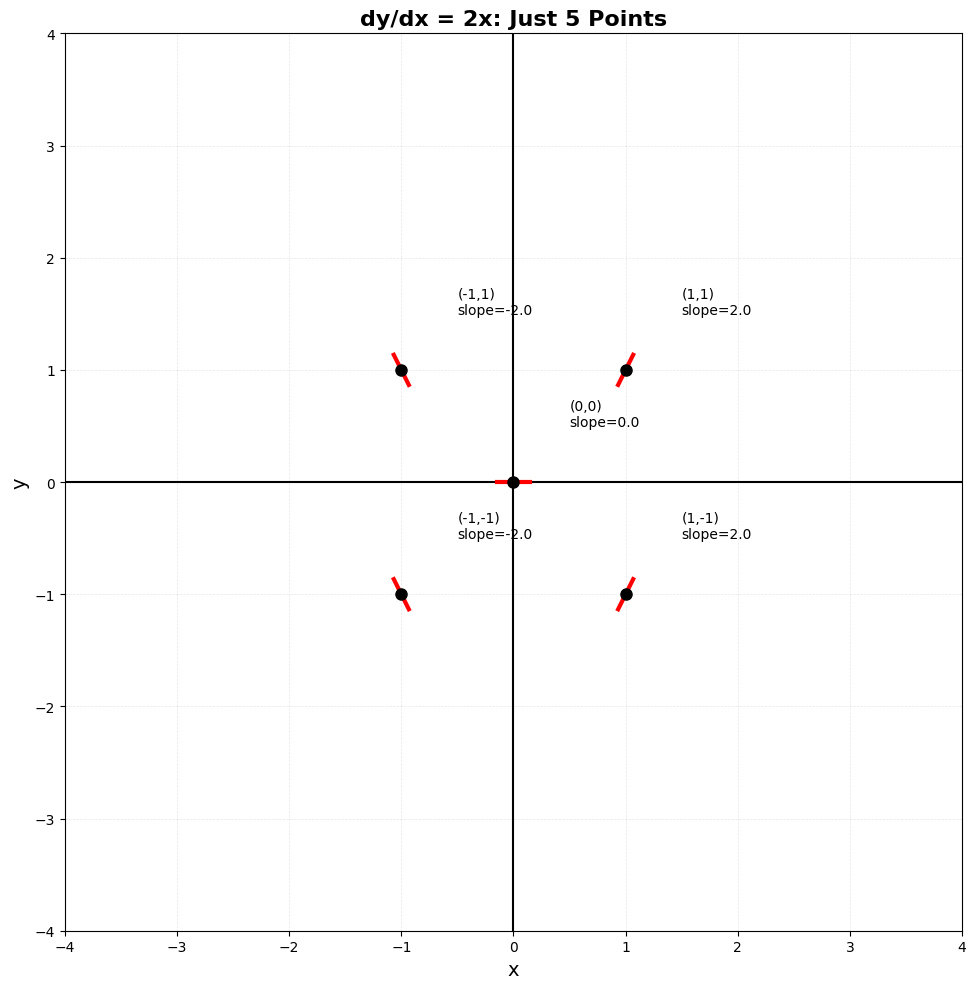

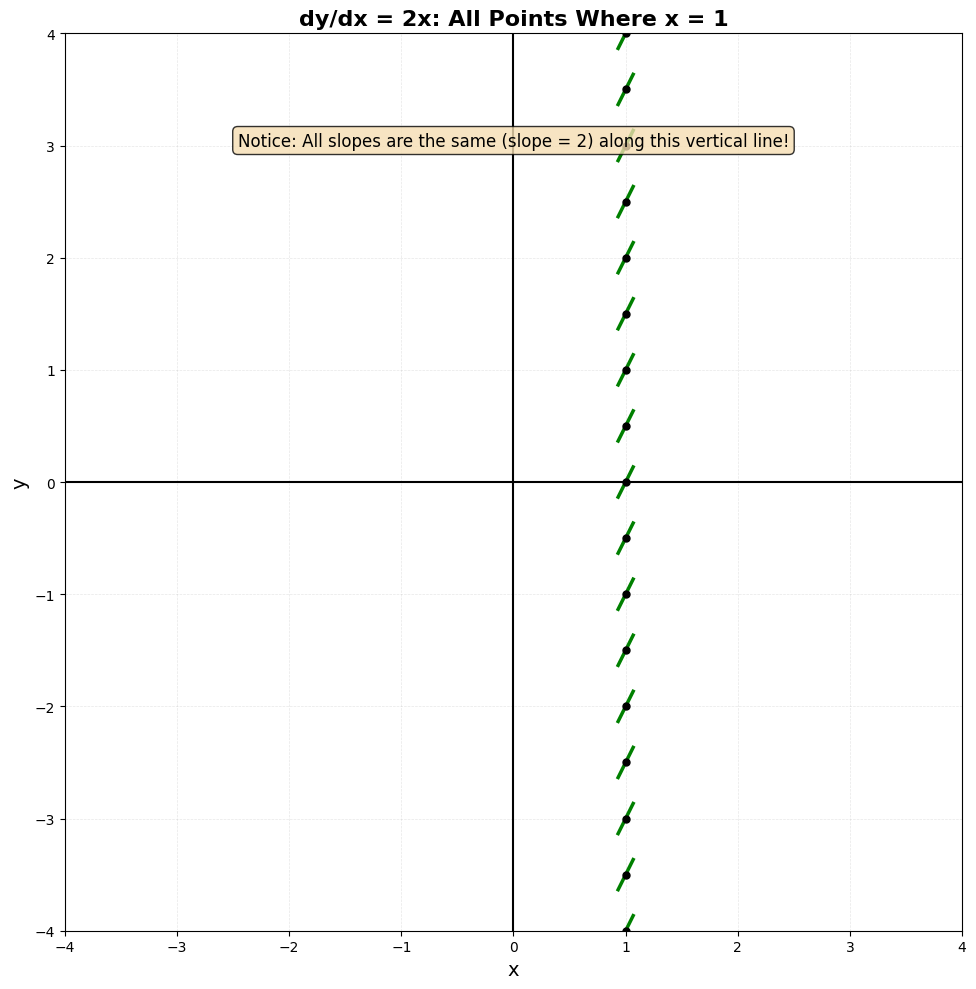

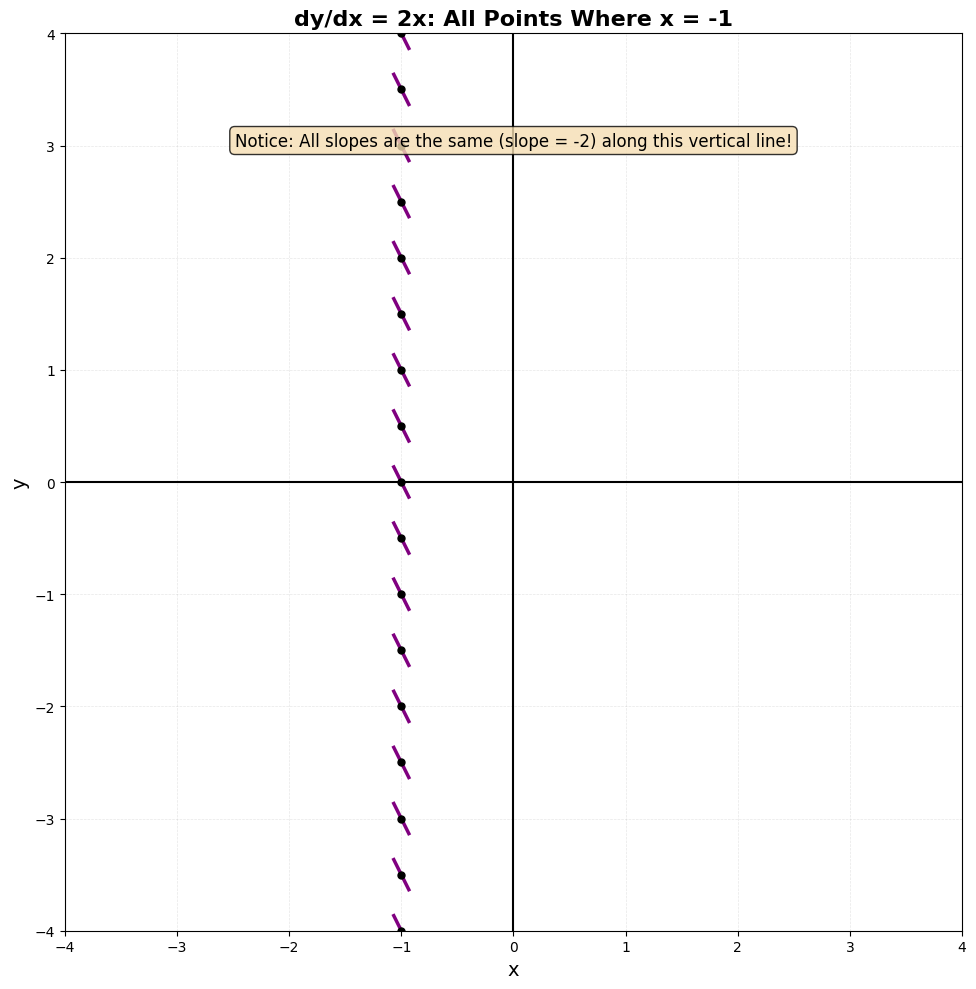

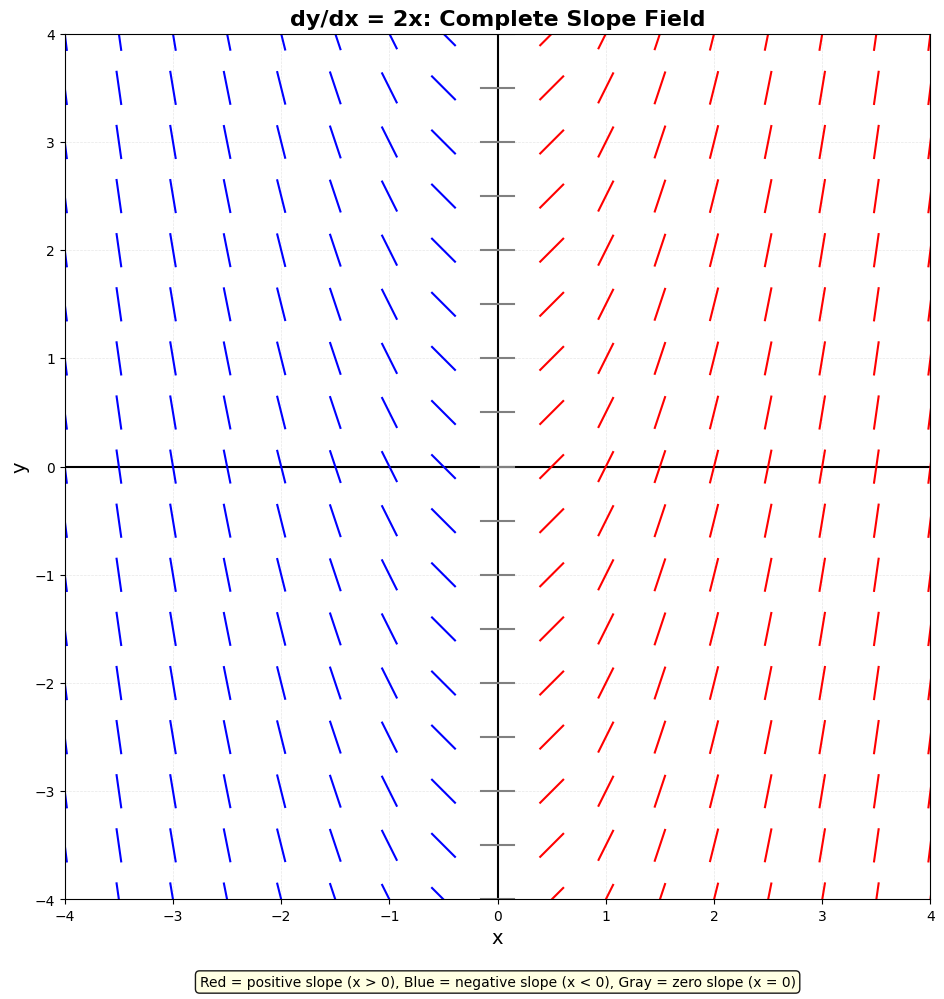

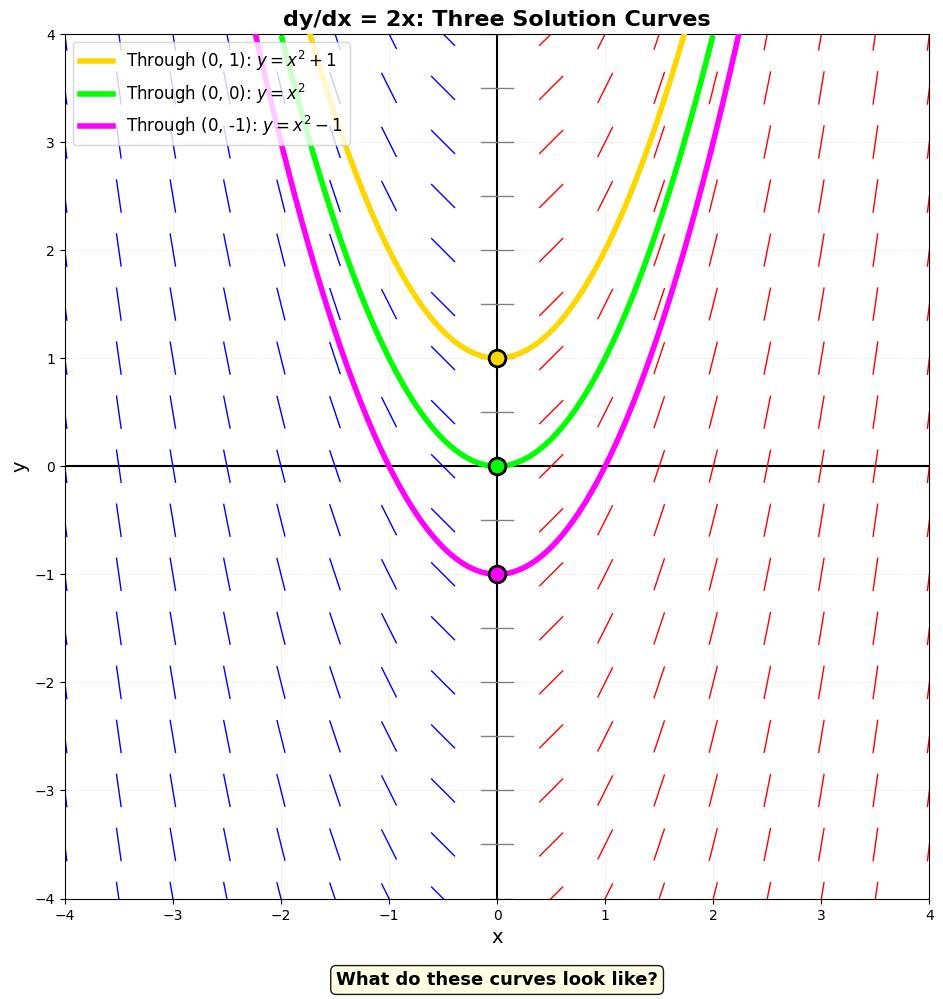

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope):
        dx = 0
        dy = length / 2
    else:
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

# For dy/dx = 2x, the slope at any point (x,y) is just 2x
def slope_function(x, y):
    return 2 * x

# STEP 1: Just 5 points - origin and four corners of the unit square
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = 2x: Just 5 Points', fontsize=16, fontweight='bold')

points = [(0, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

for x, y in points:
    slope = slope_function(x, y)
    draw_slope_segment(ax, x, y, slope, color='red', linewidth=3)
    ax.plot(x, y, 'ko', markersize=8)

# Add annotations
for x, y in points:
    slope = slope_function(x, y)
    ax.annotate(f'({x},{y})\nslope={slope:.1f}',
                xy=(x, y), xytext=(x+0.5, y+0.5),
                fontsize=10, ha='left')

plt.tight_layout()
plt.show()

# STEP 2: All points with x = 1
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = 2x: All Points Where x = 1', fontsize=16, fontweight='bold')

x_val = 1
y_values = np.arange(-4, 4.5, 0.5)

for y in y_values:
    slope = slope_function(x_val, y)
    draw_slope_segment(ax, x_val, y, slope, color='green', linewidth=2.5)
    ax.plot(x_val, y, 'ko', markersize=5)

ax.text(0, 3, 'Notice: All slopes are the same (slope = 2) along this vertical line!',
        fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# STEP 3: All points with x = -1
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = 2x: All Points Where x = -1', fontsize=16, fontweight='bold')

x_val = -1
y_values = np.arange(-4, 4.5, 0.5)

for y in y_values:
    slope = slope_function(x_val, y)
    draw_slope_segment(ax, x_val, y, slope, color='purple', linewidth=2.5)
    ax.plot(x_val, y, 'ko', markersize=5)

ax.text(0, 3, 'Notice: All slopes are the same (slope = -2) along this vertical line!',
        fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# STEP 4: Everything together
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = 2x: Complete Slope Field', fontsize=16, fontweight='bold')

x_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    for y in y_values:
        slope = slope_function(x, y)
        # Color code by slope value
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.5)

ax.text(0, -4.8, 'Red = positive slope (x > 0), Blue = negative slope (x < 0), Gray = zero slope (x = 0)',
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

# STEP 5: Solution curves through (0, 1), (0, 0), and (0, -1)
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = 2x: Three Solution Curves', fontsize=16, fontweight='bold')

# Draw the slope field (lighter)
for x in x_values:
    for y in y_values:
        slope = slope_function(x, y)
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.0, length=0.3)

# Define the differential equation for the solver
def dy_dx(x, y):
    return 2 * x

# Initial conditions
initial_conditions = [(0, 1), (0, 0), (0, -1)]
colors_sol = ['gold', 'lime', 'magenta']
labels = ['Through (0, 1): $y = x^2 + 1$',
          'Through (0, 0): $y = x^2$',
          'Through (0, -1): $y = x^2 - 1$']

for (x0, y0), color, label in zip(initial_conditions, colors_sol, labels):
    # Solve forward
    sol_forward = solve_ivp(lambda t, y: dy_dx(t, y), [x0, 4], [y0],
                           dense_output=True, max_step=0.1)
    x_forward = np.linspace(x0, 4, 200)
    y_forward = sol_forward.sol(x_forward)[0]

    # Solve backward
    sol_backward = solve_ivp(lambda t, y: dy_dx(t, y), [x0, -4], [y0],
                            dense_output=True, max_step=0.1)
    x_backward = np.linspace(x0, -4, 200)
    y_backward = sol_backward.sol(x_backward)[0]

    # Combine
    x_solution = np.concatenate([x_backward[::-1], x_forward[1:]])
    y_solution = np.concatenate([y_backward[::-1], y_forward[1:]])

    # Only plot where y is in bounds
    mask = (y_solution >= -4) & (y_solution <= 4)
    ax.plot(x_solution[mask], y_solution[mask], color=color, linewidth=4, label=label, zorder=5)

    # Mark initial condition
    ax.plot(x0, y0, 'o', color=color, markersize=12,
            markeredgecolor='black', markeredgewidth=2, zorder=6)

ax.legend(fontsize=12, loc='upper left')
ax.text(0, -4.8, 'What do these curves look like?',
        fontsize=13, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

## Example 3: $\frac{dy}{dx} = -\frac{x}{y}$

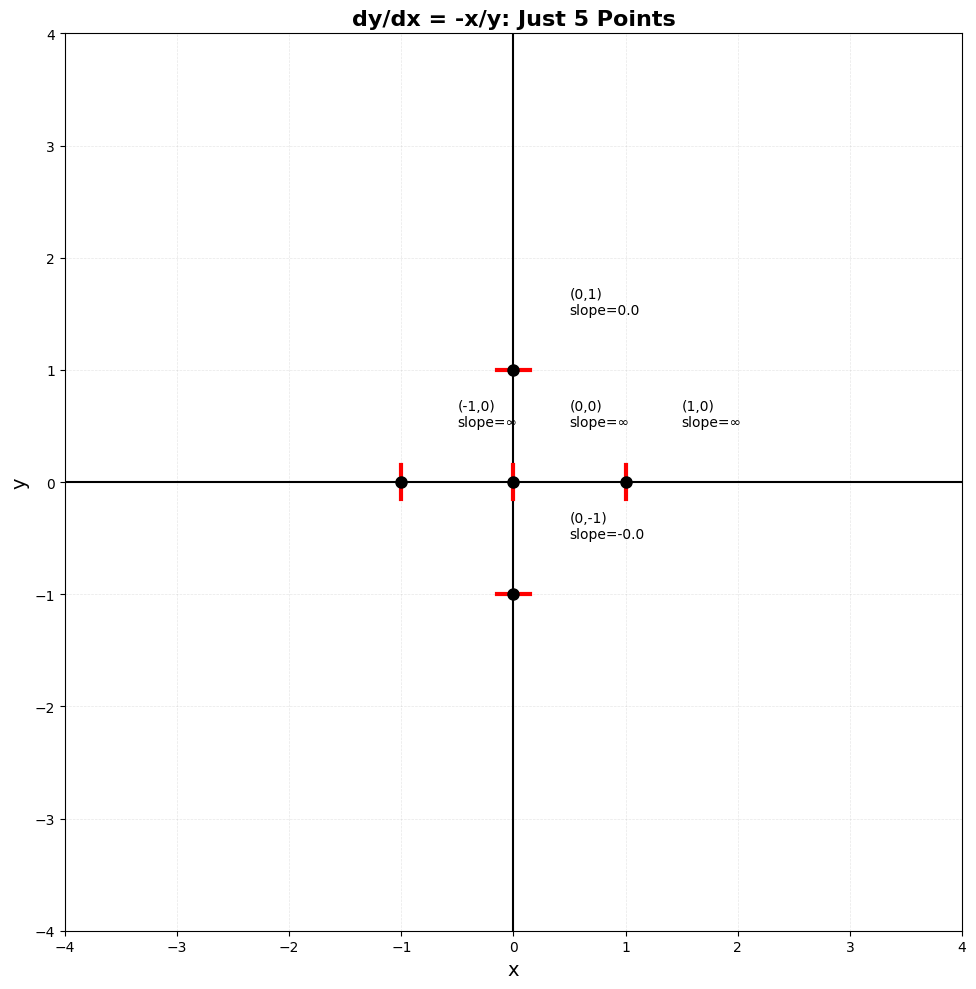

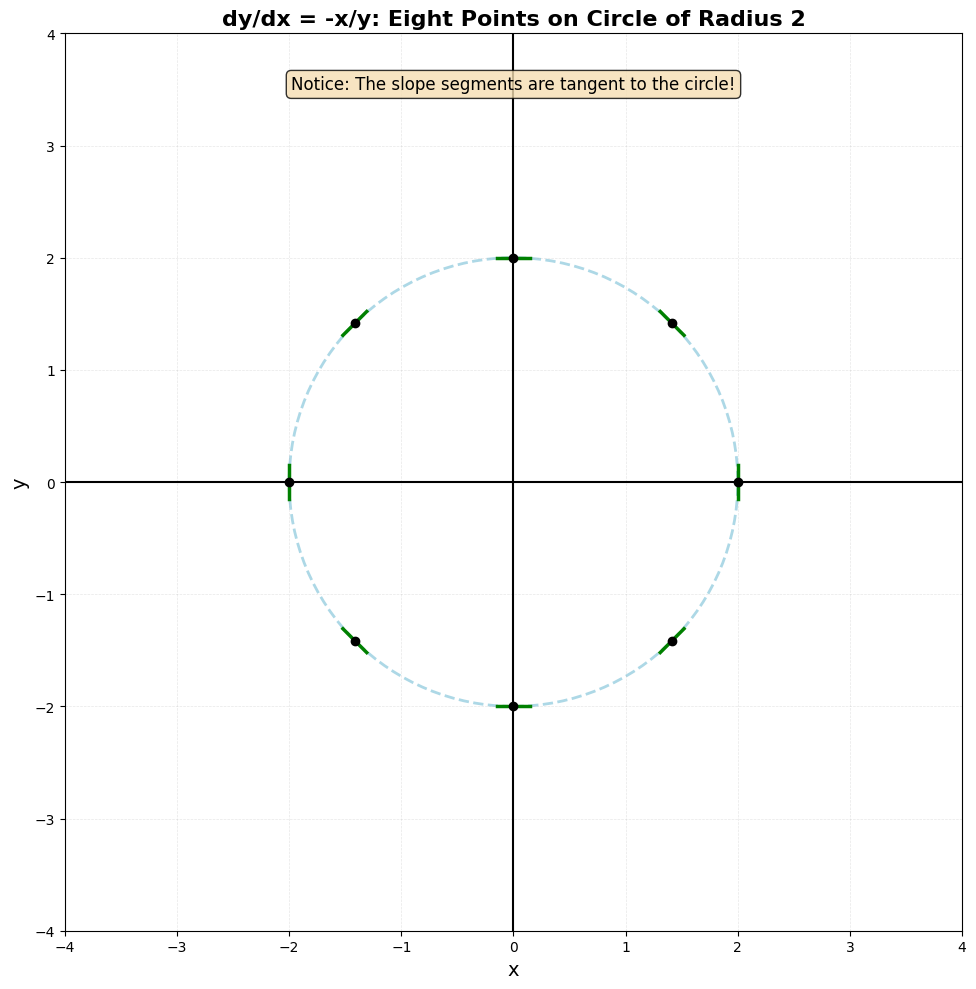

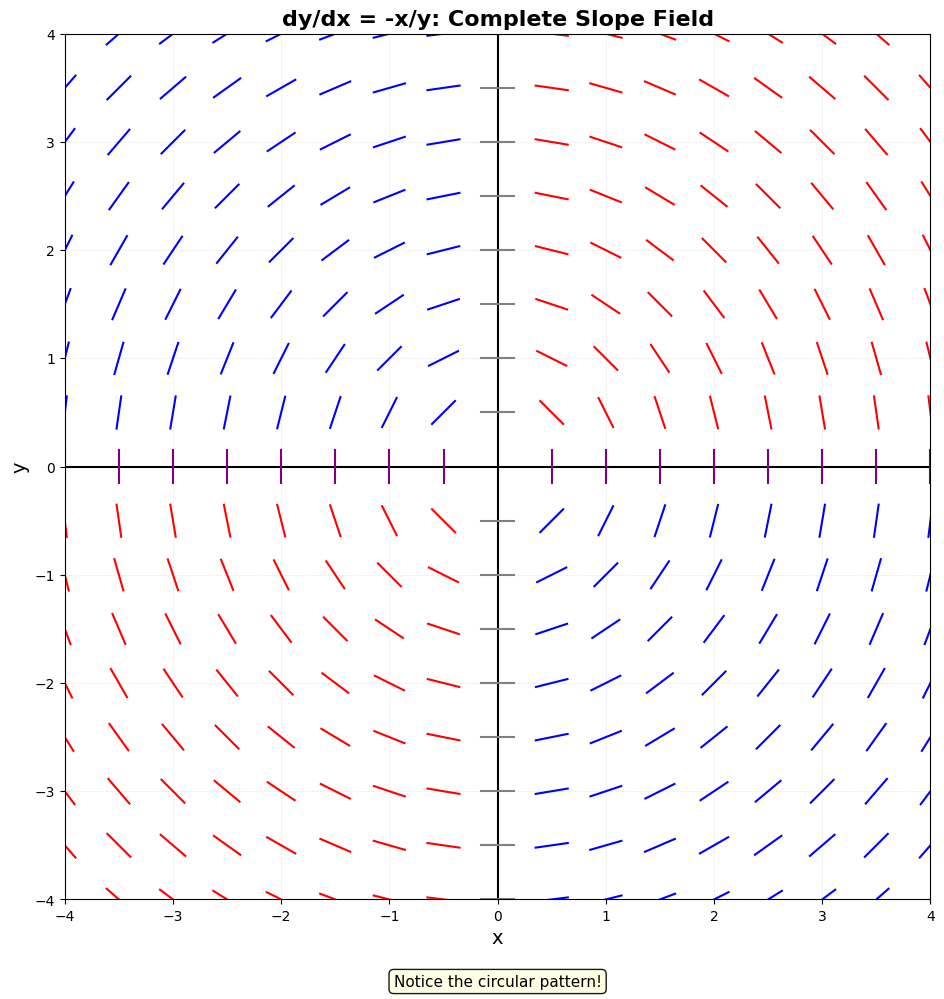

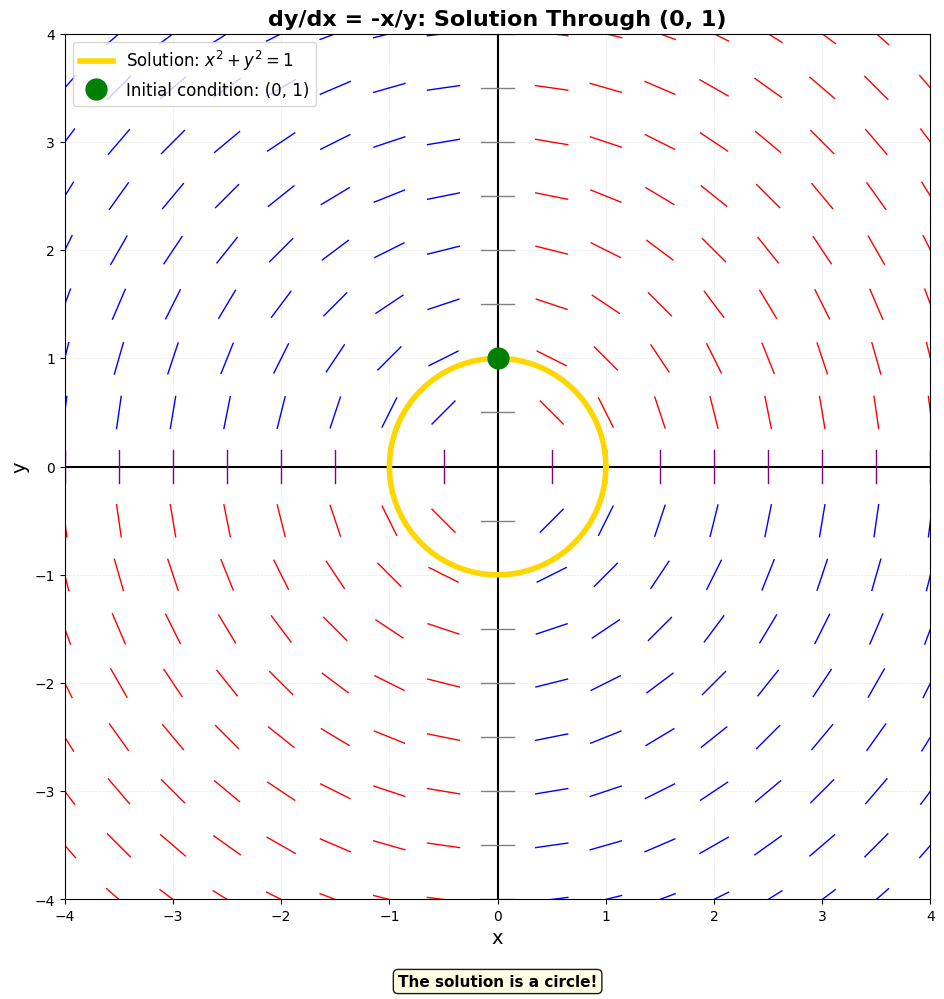

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope) or np.isnan(slope):
        # Vertical line for infinite/undefined slope
        dx = 0
        dy = length / 2
    else:
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

# For dy/dx = -x/y, the slope at any point (x,y) is -x/y
def slope_function(x, y):
    if y == 0:
        return np.inf  # undefined slope (vertical)
    return -x / y

# STEP 1: Just 5 points - origin and four cardinal points
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = -x/y: Just 5 Points', fontsize=16, fontweight='bold')

points = [(0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]

for x, y in points:
    slope = slope_function(x, y)
    draw_slope_segment(ax, x, y, slope, color='red', linewidth=3)
    ax.plot(x, y, 'ko', markersize=8)

# Add annotations
for x, y in points:
    slope = slope_function(x, y)
    if np.isinf(slope):
        slope_text = '∞'
    elif np.isnan(slope):
        slope_text = 'undefined'
    else:
        slope_text = f'{slope:.1f}'
    ax.annotate(f'({x},{y})\nslope={slope_text}',
                xy=(x, y), xytext=(x+0.5, y+0.5),
                fontsize=10, ha='left')

plt.tight_layout()
plt.show()

# STEP 2: Eight points on circle of radius 2
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = -x/y: Eight Points on Circle of Radius 2', fontsize=16, fontweight='bold')

# Eight evenly spaced points on circle of radius 2
angles = np.linspace(0, 2*np.pi, 9)[:-1]  # 8 points (exclude the repeated 2π = 0)
radius = 2
circle_points = [(radius * np.cos(angle), radius * np.sin(angle)) for angle in angles]

for x, y in circle_points:
    slope = slope_function(x, y)
    draw_slope_segment(ax, x, y, slope, color='green', linewidth=2.5)
    ax.plot(x, y, 'ko', markersize=6)

# Draw the circle to show the pattern
circle = plt.Circle((0, 0), radius, color='lightblue', fill=False, linewidth=2, linestyle='--')
ax.add_patch(circle)

ax.text(0, 3.5, 'Notice: The slope segments are tangent to the circle!',
        fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# STEP 3: Complete Slope Field
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = -x/y: Complete Slope Field', fontsize=16, fontweight='bold')

x_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-4, 4.5, 0.5)

for x in x_values:
    for y in y_values:
        if abs(y) < 0.01:  # Skip points too close to y=0 to avoid division issues
            continue
        slope = slope_function(x, y)
        # Color code by quadrant or slope
        if x * y > 0:  # Quadrants I and III (positive slope)
            color = 'red'
        elif x * y < 0:  # Quadrants II and IV (negative slope)
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.5, length=0.3)

# Add vertical segments along x-axis
for x in x_values:
    if abs(x) > 0.01:
        draw_slope_segment(ax, x, 0, np.inf, color='purple', linewidth=1.5, length=0.3)

ax.text(0, -4.8, 'Notice the circular pattern!',
        fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

# STEP 4: Solution curve through (0, 1)
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dx = -x/y: Solution Through (0, 1)', fontsize=16, fontweight='bold')

# Draw the slope field (lighter)
for x in x_values:
    for y in y_values:
        if abs(y) < 0.01:
            continue
        slope = slope_function(x, y)
        if x * y > 0:
            color = 'red'
        elif x * y < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, x, y, slope, color=color, linewidth=1.0, length=0.3)

# Add vertical segments along x-axis
for x in x_values:
    if abs(x) > 0.01:
        draw_slope_segment(ax, x, 0, np.inf, color='purple', linewidth=1.0, length=0.3)

# The solution through (0,1) is the circle x^2 + y^2 = 1
theta = np.linspace(0, 2*np.pi, 500)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

ax.plot(x_circle, y_circle, 'gold', linewidth=4, label='Solution: $x^2 + y^2 = 1$', zorder=5)
ax.plot(0, 1, 'go', markersize=15, label='Initial condition: (0, 1)', zorder=6)

ax.legend(fontsize=12, loc='upper left')
ax.text(0, -4.8, 'The solution is a circle!',
        fontsize=11, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

### Let's verify this is correct using implicit differentiation!

If $x^2 + y^2 = C^2$ (a circle of radius $C$), then differentiating both sides with respect to $x$:

$$\frac{d}{dx}(x^2 + y^2) = \frac{d}{dx}(C^2)$$

$$2x + 2y\frac{dy}{dx} = 0$$

$$2y\frac{dy}{dx} = -2x$$

$$\frac{dy}{dx} = -\frac{x}{y}$$

This matches our differential equation! So circles really are solutions to $\frac{dy}{dx} = -\frac{x}{y}$.

## Example 4: $\frac{dy}{dt} = 2 - y$

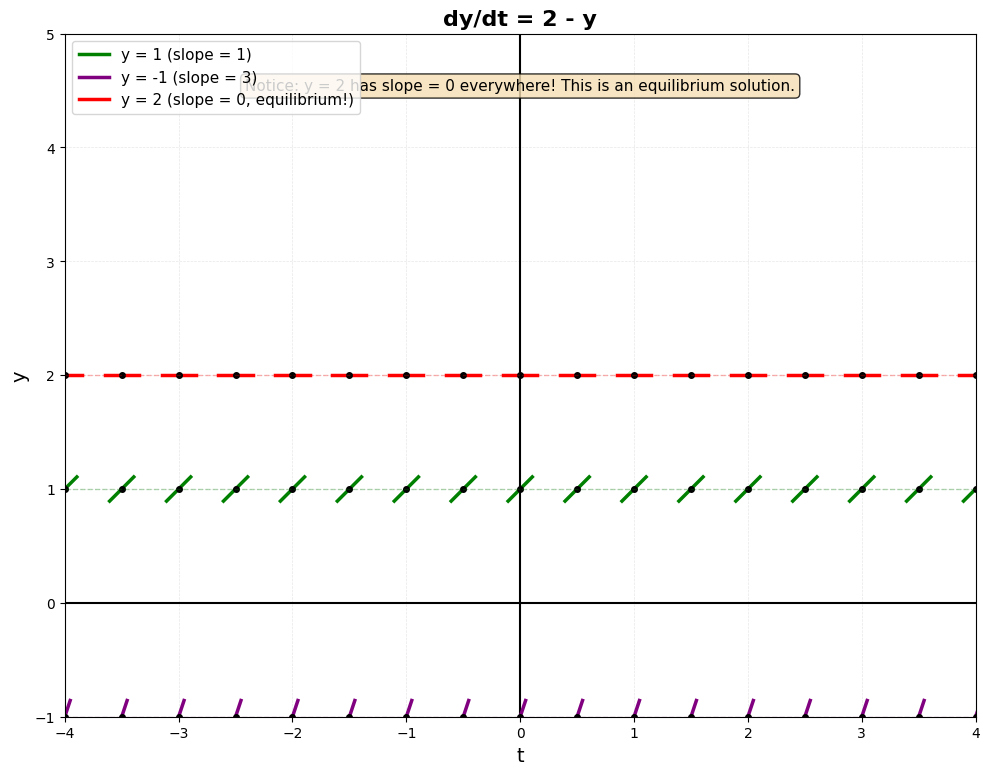

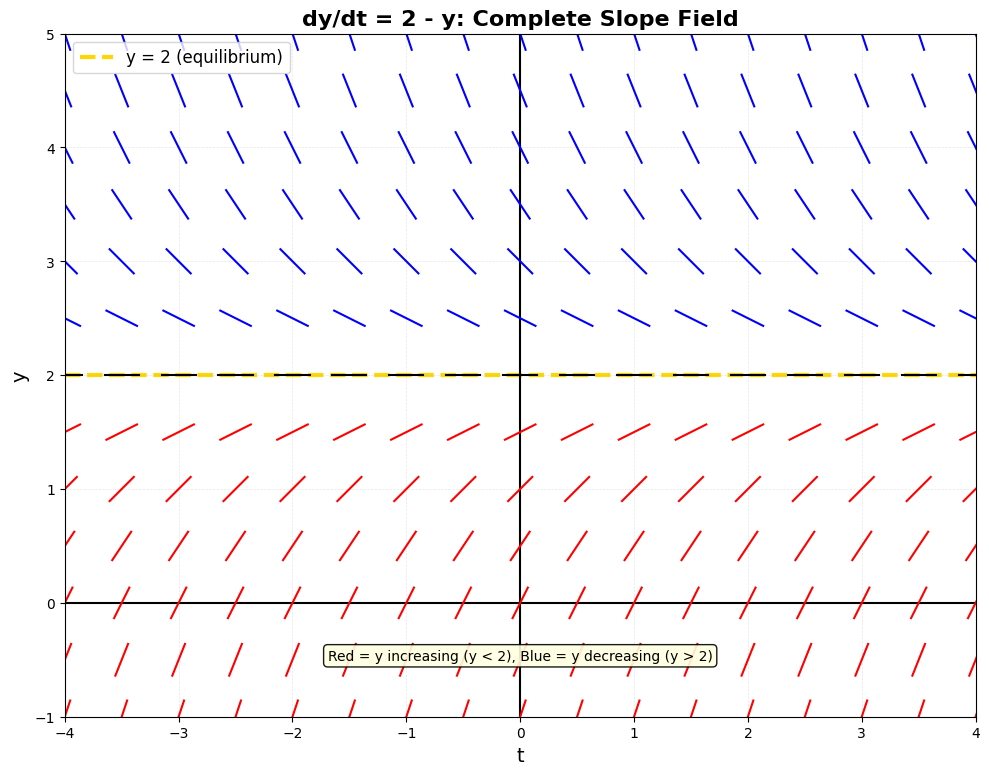

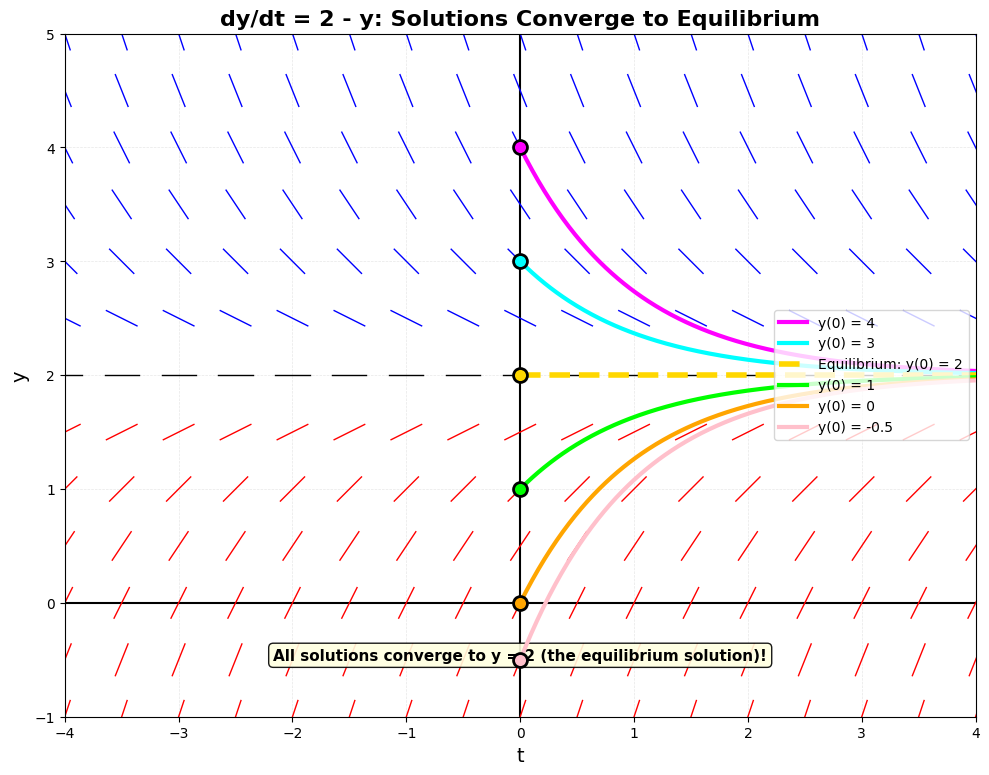

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('t', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope) or np.isnan(slope):
        dx = 0
        dy = length / 2
    else:
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

# For dy/dt = 2 - y, the slope at any point (t,y) is 2 - y
def slope_function(t, y):
    return 2 - y

# STEP 1: Slopes along y = 1, y = -1, and y = 2
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dt = 2 - y', fontsize=16, fontweight='bold')

t_values = np.arange(-4, 4.5, 0.5)
y_lines = [1, -1, 2]
colors_lines = ['green', 'purple', 'red']
labels_lines = ['y = 1 (slope = 1)', 'y = -1 (slope = 3)', 'y = 2 (slope = 0, equilibrium!)']

for y_val, color, label in zip(y_lines, colors_lines, labels_lines):
    for t in t_values:
        slope = slope_function(t, y_val)
        draw_slope_segment(ax, t, y_val, slope, color=color, linewidth=2.5)
        ax.plot(t, y_val, 'ko', markersize=4)

    # Draw the horizontal line
    ax.axhline(y=y_val, color=color, alpha=0.3, linewidth=1, linestyle='--')

ax.text(0, 4.5, 'Notice: y = 2 has slope = 0 everywhere! This is an equilibrium solution.',
        fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=c, lw=2.5, label=l)
                   for c, l in zip(colors_lines, labels_lines)]
ax.legend(handles=legend_elements, fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

# STEP 2: Complete Slope Field
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dt = 2 - y: Complete Slope Field', fontsize=16, fontweight='bold')

t_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-1, 5.5, 0.5)

for t in t_values:
    for y in y_values:
        slope = slope_function(t, y)
        # Color code by slope
        if slope > 0:
            color = 'red'  # y < 2, dy/dt > 0, y increasing
        elif slope < 0:
            color = 'blue'  # y > 2, dy/dt < 0, y decreasing
        else:
            color = 'black'  # y = 2, equilibrium
        draw_slope_segment(ax, t, y, slope, color=color, linewidth=1.5, length=0.3)

# Highlight the equilibrium line
ax.axhline(y=2, color='gold', linewidth=3, linestyle='--', label='y = 2 (equilibrium)', zorder=1)

ax.legend(fontsize=12, loc='upper left')
ax.text(0, -0.5, 'Red = y increasing (y < 2), Blue = y decreasing (y > 2)',
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

# STEP 3: Solution curves showing convergence to equilibrium
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dt = 2 - y: Solutions Converge to Equilibrium', fontsize=16, fontweight='bold')

# Draw the slope field (lighter)
for t in t_values:
    for y in y_values:
        slope = slope_function(t, y)
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'black'
        draw_slope_segment(ax, t, y, slope, color=color, linewidth=1.0, length=0.3)

# Define the differential equation for the solver
def dy_dt(t, y):
    return 2 - y[0]

# Initial conditions to show convergence
initial_conditions = [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (0, -0.5)]
colors_sol = ['magenta', 'cyan', 'gold', 'lime', 'orange', 'pink']

for (t0, y0), color in zip(initial_conditions, colors_sol):
    # Solve forward
    sol = solve_ivp(dy_dt, [t0, 4], [y0], dense_output=True, max_step=0.05)
    t_sol = np.linspace(t0, 4, 300)
    y_sol = sol.sol(t_sol)[0]

    # Only plot where y is in bounds
    mask = (y_sol >= -1) & (y_sol <= 5)

    if y0 == 2:
        # Equilibrium solution
        ax.plot(t_sol[mask], y_sol[mask], color=color, linewidth=4,
                label=f'Equilibrium: y(0) = {y0}', zorder=5, linestyle='--')
    else:
        ax.plot(t_sol[mask], y_sol[mask], color=color, linewidth=3,
                label=f'y(0) = {y0}', zorder=5)

    # Mark initial condition
    ax.plot(t0, y0, 'o', color=color, markersize=10,
            markeredgecolor='black', markeredgewidth=2, zorder=6)

ax.legend(fontsize=10, loc='right')
ax.text(0, -0.5, 'All solutions converge to y = 2 (the equilibrium solution)!',
        fontsize=11, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

### Equilibrium Solutions

An **equilibrium solution** is a constant solution where $\frac{dy}{dt} = 0$ for all values of $t$.

In the previous example, $\frac{dy}{dt} = 2 - y$, we found the equilibrium by setting:
$$2 - y = 0 \implies y = 2$$

So $y = 2$ is the equilibrium solution - a horizontal line where the solution doesn't change over time.

**Important:** Not every differential equation has an equilibrium solution! For example, $\frac{dy}{dt} = \frac{t}{y}$ has no equilibrium because the right side depends on $t$, which is always changing. There's no constant value of $y$ that makes $\frac{dy}{dt} = 0$ for all $t$.

## Example 5: $\frac{dy}{dt} = \frac{t}{y}$

This differential equation has **no equilibrium solution** because the slope depends on $t$.

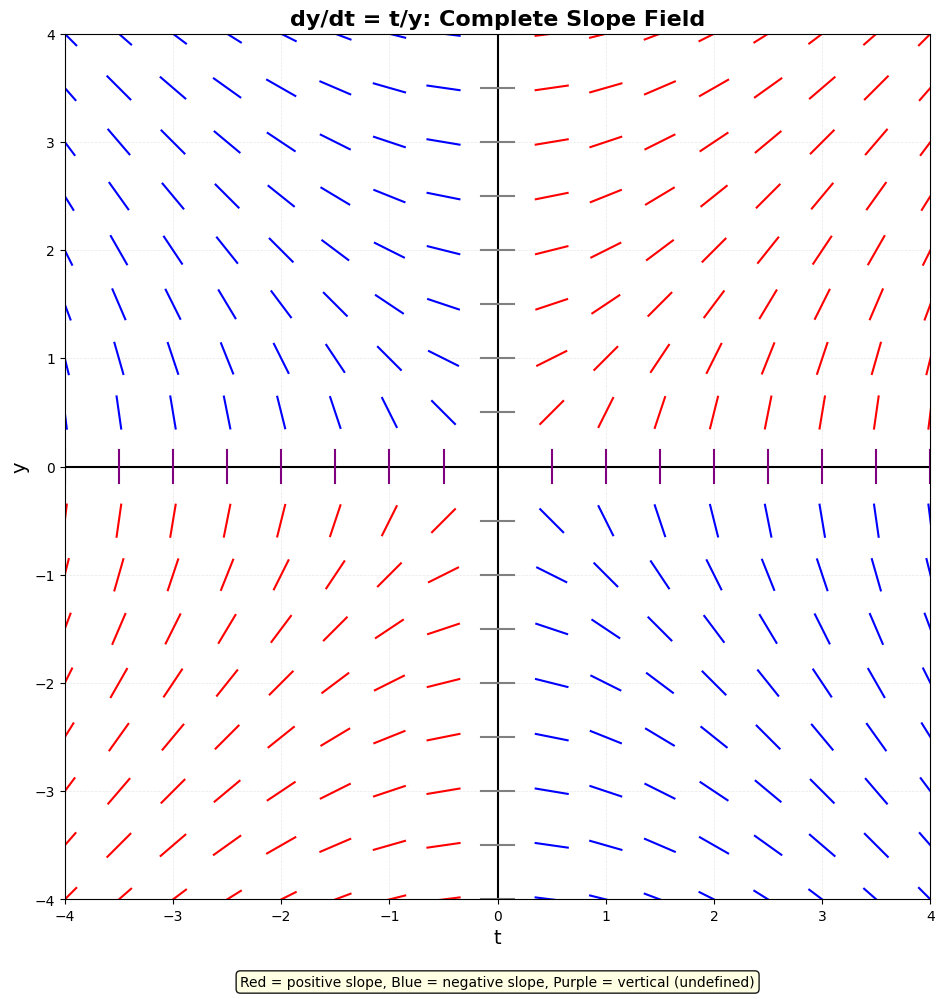

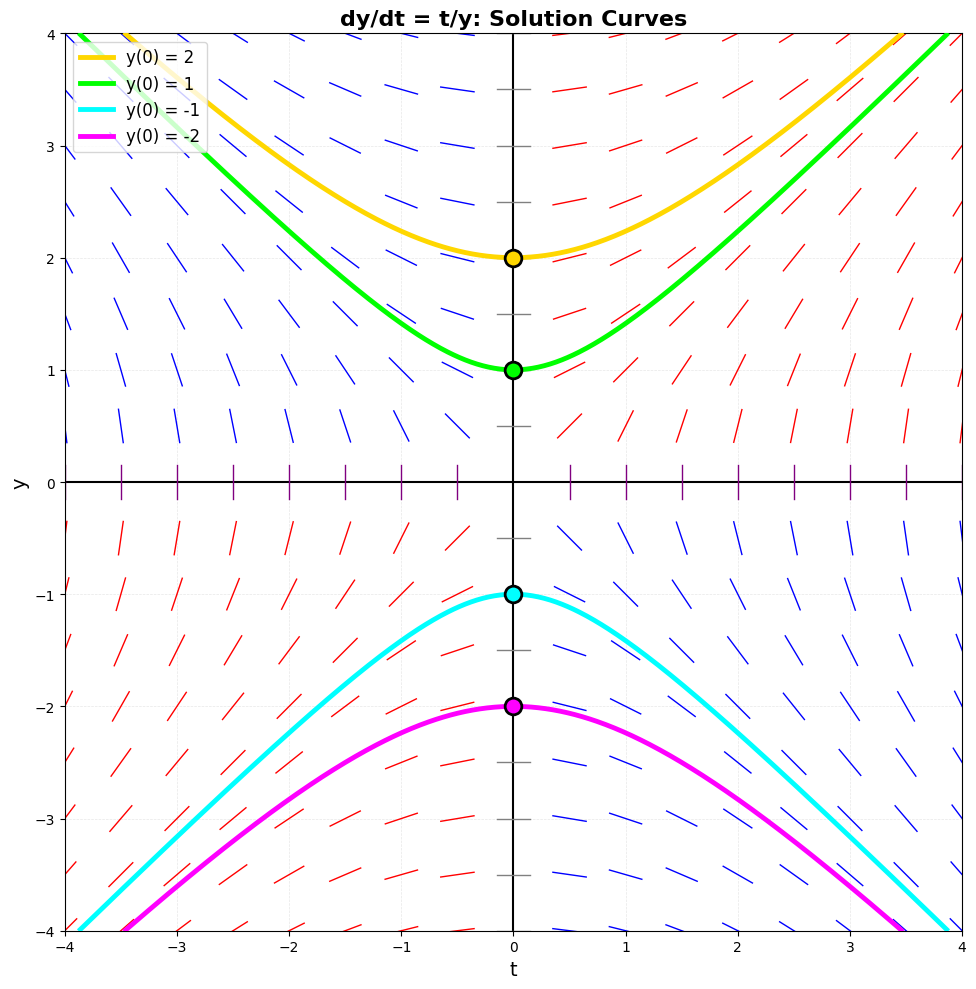

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def setup_slope_field_axes():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.axhline(y=0, color='k', linewidth=1.5)
    ax.axvline(x=0, color='k', linewidth=1.5)
    ax.set_xlabel('t', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    return fig, ax

def draw_slope_segment(ax, x, y, slope, length=0.3, color='blue', linewidth=2):
    """Draw a small line segment centered at (x,y) with given slope"""
    if np.isinf(slope) or np.isnan(slope):
        dx = 0
        dy = length / 2
    else:
        angle = np.arctan(slope)
        dx = (length / 2) * np.cos(angle)
        dy = (length / 2) * np.sin(angle)

    ax.plot([x - dx, x + dx], [y - dy, y + dy], color=color, linewidth=linewidth)

# For dy/dt = t/y, the slope at any point (t,y) is t/y
def slope_function(t, y):
    if abs(y) < 0.01:
        return np.inf  # very steep when y is near 0
    return t / y

# Complete Slope Field
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dt = t/y: Complete Slope Field', fontsize=16, fontweight='bold')

t_values = np.arange(-4, 4.5, 0.5)
y_values = np.arange(-4, 4.5, 0.5)

for t in t_values:
    for y in y_values:
        if abs(y) < 0.2:  # Skip points too close to y=0
            continue
        slope = slope_function(t, y)
        # Color code by slope
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, t, y, slope, color=color, linewidth=1.5, length=0.3)

# Add vertical segments along t-axis (where y=0, slopes are undefined)
for t in t_values:
    if abs(t) > 0.2:
        draw_slope_segment(ax, t, 0, np.inf, color='purple', linewidth=1.5, length=0.3)

ax.text(0, -4.8, 'Red = positive slope, Blue = negative slope, Purple = vertical (undefined)',
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

# Solution curves
fig, ax = setup_slope_field_axes()
ax.set_title('dy/dt = t/y: Solution Curves', fontsize=16, fontweight='bold')

# Draw the slope field (lighter)
for t in t_values:
    for y in y_values:
        if abs(y) < 0.2:
            continue
        slope = slope_function(t, y)
        if slope > 0:
            color = 'red'
        elif slope < 0:
            color = 'blue'
        else:
            color = 'gray'
        draw_slope_segment(ax, t, y, slope, color=color, linewidth=1.0, length=0.3)

# Add vertical segments
for t in t_values:
    if abs(t) > 0.2:
        draw_slope_segment(ax, t, 0, np.inf, color='purple', linewidth=1.0, length=0.3)

# Define the differential equation for the solver
def dy_dt(t, y):
    if abs(y[0]) < 0.01:
        return 1000 * np.sign(t)  # Large value to approximate vertical
    return t / y[0]

# Initial conditions - start from t=0 with different y values
initial_conditions = [(0, 2), (0, 1), (0, -1), (0, -2)]
colors_sol = ['gold', 'lime', 'cyan', 'magenta']

for (t0, y0), color in zip(initial_conditions, colors_sol):
    # Solve forward (t from 0 to 4)
    sol_forward = solve_ivp(dy_dt, [t0, 3.9], [y0], dense_output=True, max_step=0.05)
    t_forward = np.linspace(t0, 3.9, 300)
    y_forward = sol_forward.sol(t_forward)[0]

    # Solve backward (t from 0 to -4)
    sol_backward = solve_ivp(dy_dt, [t0, -3.9], [y0], dense_output=True, max_step=0.05)
    t_backward = np.linspace(t0, -3.9, 300)
    y_backward = sol_backward.sol(t_backward)[0]

    # Combine solutions
    t_solution = np.concatenate([t_backward[::-1], t_forward[1:]])
    y_solution = np.concatenate([y_backward[::-1], y_forward[1:]])

    # Only plot where y is in bounds
    mask = (y_solution >= -4) & (y_solution <= 4)
    ax.plot(t_solution[mask], y_solution[mask], color=color, linewidth=3.5,
            label=f'y(0) = {y0}', zorder=5)

    # Mark initial condition
    ax.plot(t0, y0, 'o', color=color, markersize=12,
            markeredgecolor='black', markeredgewidth=2, zorder=6)

ax.legend(fontsize=12, loc='upper left')


plt.tight_layout()
plt.show()